# **EcoInsights**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\Compu\\OneDrive\\Documents\\vscode-projects\\GlobalEcoInsights2000-2024\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\Compu\\OneDrive\\Documents\\vscode-projects\\GlobalEcoInsights2000-2024'

# Section 1 - ETL

Section 1 content

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import streamlit as st

### Importance of Importing Libraries for Data Analytics


Data analytics requires importing libraries because they offer ready-made functions and tools that make complex tasks easier. The `pandas`, `numpy`, and `matplotlib` libraries facilitate efficient data manipulation tasks while providing statistical analysis capabilities and visualization tools. Through time efficiency and coding effort reduction these libraries establish accuracy so analysts can concentrate on insights derivation instead of recreating the wheel.l.


Begin data exploration

In [5]:
# Load the dataset into a pandas dataframe
df = pd.read_csv('temperature.csv')

# Load the first 5 rows of the dataset
df.head()

,Year,Country,Avg_Temperature_degC,CO2_Emissions_tons_per_capita,Sea_Level_Rise_mm,Rainfall_mm,Population,Renewable_Energy_pct,Extreme_Weather_Events,Forest_Area_pct
0,2006,UK,8.9,9.3,3.1,1441,530911230,20.4,14,59.8
1,2019,USA,31.0,4.8,4.2,2407,107364344,49.2,8,31.0
2,2014,France,33.9,2.8,2.2,1241,441101758,33.3,9,35.5
3,2010,Argentina,5.9,1.8,3.2,1892,1069669579,23.7,7,17.7
4,2007,Germany,26.9,5.6,2.4,1743,124079175,12.5,4,17.4


In [6]:
# Get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           1000 non-null   int64  
 1   Country                        1000 non-null   object 
 2   Avg_Temperature_degC           1000 non-null   float64
 3   CO2_Emissions_tons_per_capita  1000 non-null   float64
 4   Sea_Level_Rise_mm              1000 non-null   float64
 5   Rainfall_mm                    1000 non-null   int64  
 6   Population                     1000 non-null   int64  
 7   Renewable_Energy_pct           1000 non-null   float64
 8   Extreme_Weather_Events         1000 non-null   int64  
 9   Forest_Area_pct                1000 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 78.3+ KB


### Results of `df.head()` and `df.info()`

* **`df.head()`**:
- The `df.head()` function shows the top 5 rows from the dataset.
- The function shows a brief overview of the data structure with examples of column names and sample data values.
- This command assists users in examining data content alongside format while identifying issues such as unexpected data types and values.
- This function helps confirm that the dataset loading process was successful.

* **`df.info()`**:
- Provides a concise summary of the dataset.
- The command reveals the complete dataset dimensions with the total row and column counts alongside names and data types for each column.
- The count of non-null entries in each column appears here so you can identify missing values.
- The feature displays memory consumption which allows users to optimize performance while handling large datasets.
- This tool helps users evaluate their dataset's structure and assess its preparedness for analysis.

In [7]:
# Display the shape of the dataframe
df.shape


(1000, 10)

In [8]:
# Print descriptive statistics of the dataset
df.describe()

,Year,Avg_Temperature_degC,CO2_Emissions_tons_per_capita,Sea_Level_Rise_mm,Rainfall_mm,Population,Renewable_Energy_pct,Extreme_Weather_Events,Forest_Area_pct
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,2011.432000,19.883100,10.425800,3.009600,1738.761000,7.053830e+08,27.300500,7.291000,40.572000
std,7.147199,8.542897,5.614665,1.146081,708.976616,4.093910e+08,12.970808,4.422655,17.398998
min,2000.000000,5.000000,0.500000,1.000000,501.000000,3.660891e+06,5.100000,0.000000,10.100000
25%,2005.000000,12.175000,5.575000,2.000000,1098.750000,3.436242e+08,16.100000,3.000000,25.600000
50%,2012.000000,20.100000,10.700000,3.000000,1726.000000,7.131166e+08,27.150000,8.000000,41.150000
75%,2018.000000,27.225000,15.400000,4.000000,2362.500000,1.073868e+09,38.925000,11.000000,55.800000
max,2023.000000,34.900000,20.000000,5.000000,2999.000000,1.397016e+09,50.000000,14.000000,70.000000


## Results of `df.shape` and `df.describe()`

* **`df.shape`**:
- The `df.shape` function gives you a quick look at the dimensions of your dataset by returning a tuple: `(number_of_rows, number_of_columns)`.
- This is super handy for getting a sense of how big your data is, which is essential when you're diving into analysis.
- For instance, if you see a shape of `(1000, 10)`, that tells you your dataset has 1000 rows and 10 columns.

* **`df.describe()`**:
- The `df.describe()` function provides a summary of descriptive statistics for the numerical columns in your dataset.
- It covers important metrics like count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum values.
- This overview is great for spotting how your data is distributed, identifying any outliers, and getting a feel for the range and central tendency of your numerical features.
- It's a vital part of exploratory data analysis, helping you understand the statistical properties of your dataset.

In [9]:
# Check data types
df.dtypes

Year                               int64
Country                           object
Avg_Temperature_degC             float64
CO2_Emissions_tons_per_capita    float64
Sea_Level_Rise_mm                float64
Rainfall_mm                        int64
Population                         int64
Renewable_Energy_pct             float64
Extreme_Weather_Events             int64
Forest_Area_pct                  float64
dtype: object

In [10]:
# Check for missing values
df.isnull().sum()

Year                             0
Country                          0
Avg_Temperature_degC             0
CO2_Emissions_tons_per_capita    0
Sea_Level_Rise_mm                0
Rainfall_mm                      0
Population                       0
Renewable_Energy_pct             0
Extreme_Weather_Events           0
Forest_Area_pct                  0
dtype: int64

In [11]:
# Check for duplicates
df.duplicated().sum()

0

In [12]:
# Check categorical columns
df['Country'].value_counts()

Country
Indonesia         75
Russia            74
USA               73
'South Africa'    73
India             70
Argentina         67
China             67
Brazil            67
Canada            67
France            66
UK                65
Japan             63
Germany           61
Australia         57
Mexico            55
Name: count, dtype: int64

### Results of Checking `df['Country']`, Missing Values, Duplicates, and Data Types

* **`df['Country'].value_counts()`**:
- This function tallies up how many times each unique value appears in the `Country` column.
- It gives us a clear picture of how data is spread across different countries, highlighting which ones are more or less represented in the dataset.
- This insight is key for grasping the geographical scope of the dataset and spotting any potential imbalances.

* **Checking for Missing Values (`df.isnull().sum()`)**:
- This command sums up all the missing (null) values in each column.
- It’s essential for pinpointing columns that have incomplete data, which is vital for deciding how to clean the data, whether that means filling in gaps or removing certain rows or columns.

* **Checking for Duplicates (`df.duplicated().sum()`)**:
- This function counts how many duplicate rows exist in the dataset.
- Duplicate entries can distort analysis and lead to misleading conclusions, so finding and eliminating them is a crucial part of data preprocessing.

* **Checking Data Types (`df.dtypes`)**:
- This command shows the data type for each column in the dataset.
- It’s important to make sure that columns are using the right data types (like numerical, categorical, or datetime) for effective analysis.
- If the data types are off, we might need to convert them to ensure proper analysis or visualization.

In [13]:
# Save the dataset
df.to_csv('temperature_cleaned.csv', index=False)

---

# Section 2 - Correlation analysis

### Importance of Correlation Analysis in the Dataset

Understanding how variables interrelate within a dataset can provide important insights on whether variables are correlated, and if so, to what degree they are positively or negatively correlated. Correlation analysis determines:
- **Strength and Direction of Relationships**: Correlation analysis considers whether the variables have a positive or negative relationship, and to what extent.
- **Feature Selection**: A correlation analysis can help identify duplicate features and allow selection of the most important features to include in the modeling process.
- **Insights for Decision Making**: A correlation analysis can help identify dependencies and trends in the data that may be useful in making and informing decisions when identifying strategic pathways forward. 
- **Multicollinearity Mitigating**: Identifying high correlations among independent variable helps to provide information about causing multicollinearity to data, which may lead to performance detriments.

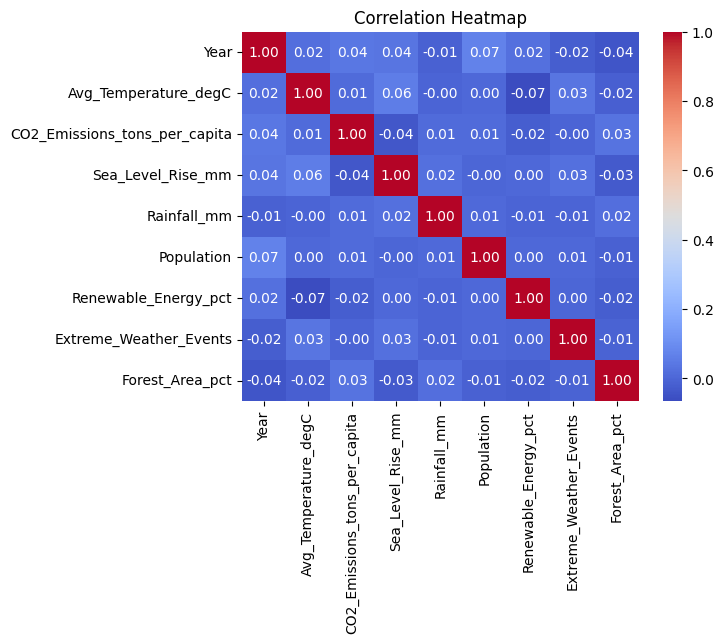

In [ ]:
# Calculate Pearson and Spearman correlations
pearson_corr = df.corr(method='pearson')
spearman_corr = df.corr(method='spearman')

# Create side-by-side heatmaps
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Pearson correlation heatmap
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Pearson Correlation')

# Spearman correlation heatmap
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Spearman Correlation')

plt.tight_layout()
plt.show()

In [28]:
# Sort the correlation results by absolute correlation values in descending order
top_3_correlations = sorted(
    correlation_results.items(),
    key=lambda x: abs(x[1]['correlation']),
    reverse=True
)[:3]

# Display the top 3 correlations
print("Top 3 Correlations:")
for idx, ((var1, var2), stats) in enumerate(top_3_correlations, start=1):
    print(f"Rank {idx}: '{var1}' and '{var2}' with a correlation coefficient of {stats['correlation']:.2f} and a p-value of {stats['p_value']:.2e}.")

# Sort the correlation results by absolute correlation values in ascending order
weakest_3_correlations = sorted(
    correlation_results.items(),
    key=lambda x: abs(x[1]['correlation'])
)[:3]

# Display the weakest 3 correlations
print("\nWeakest 3 Correlations:")
for idx, ((var1, var2), stats) in enumerate(weakest_3_correlations, start=1):
    print(f"Weak Rank {idx}: '{var1}' and '{var2}' with a correlation coefficient of {stats['correlation']:.2f} and a p-value of {stats['p_value']:.2e}.")


Top 3 Correlations:
Rank 1: 'Year' and 'Population' with a correlation coefficient of 0.07 and a p-value of 2.33e-02.
Rank 2: 'Population' and 'Year' with a correlation coefficient of 0.07 and a p-value of 2.33e-02.
Rank 3: 'Avg_Temperature_degC' and 'Renewable_Energy_pct' with a correlation coefficient of -0.07 and a p-value of 3.84e-02.

Weakest 3 Correlations:
Weak Rank 1: 'Renewable_Energy_pct' and 'Extreme_Weather_Events' with a correlation coefficient of 0.00 and a p-value of 9.96e-01.
Weak Rank 2: 'Extreme_Weather_Events' and 'Renewable_Energy_pct' with a correlation coefficient of 0.00 and a p-value of 9.96e-01.
Weak Rank 3: 'Population' and 'Sea_Level_Rise_mm' with a correlation coefficient of -0.00 and a p-value of 9.93e-01.


---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [14]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)


IndentationError: expected an indented block after 'try' statement on line 2 (553063055.py, line 5)